# Alpha Solution Fraud detection Problem

## Dataset Description

### A  :  Age {"0":age<=30, "1": 30< age <= 50,"2" : age>50}
### S  :  Sex {"0":male,"1":female}
### J  :  Buying Jewellery {"0" : No ,"Yes" : 1}
### G  :  Buying Gas {"0" : No , "Yes" : 1}
### F : Fraud { "0" : Yes ,"1" : "No"}

## *Goal*  : To predict the whether transaction is fraud or not
## *Solution* : Since presence of categorical data we adopt  Decision trees, random Forests and ANN

### EDA




           Female  Male  RowTotal
Fraud         506   468       974
Not Fraud    4452  4574      9026
ColTotal     4958  5042     10000


           Buying Jewellry  Not Buying Jewellry  RowTotal
Fraud                   66                  908       974
Not Fraud             8558                  468      9026
Coltotal              8624                 1376     10000


           Buying Gas  Not Buying Gas  RowTotal
Fraud             194             780       974
Not Fraud          96            8930      9026
ColTotal          290            9710     10000


           Less than 30  Between 30 to 50  Above 50  RowTotal
Fraud               264               376       334       974
Not Fraud          2272              3558      3196      9026
ColTotal           2536              3934      3530     10000




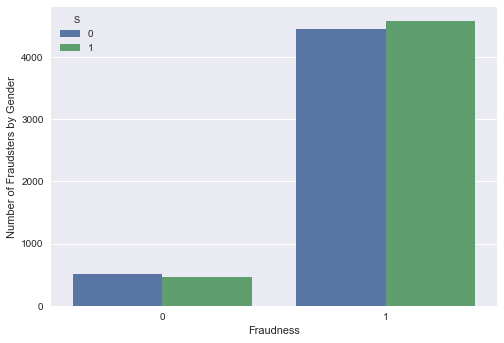

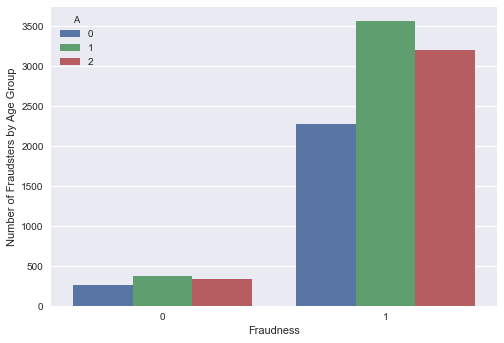

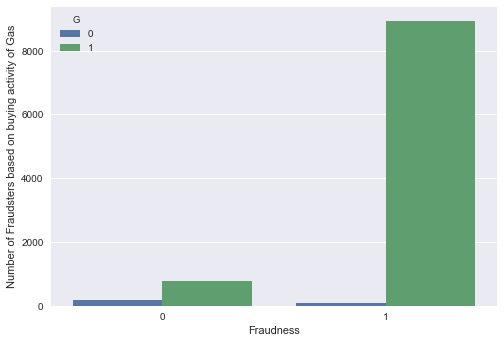

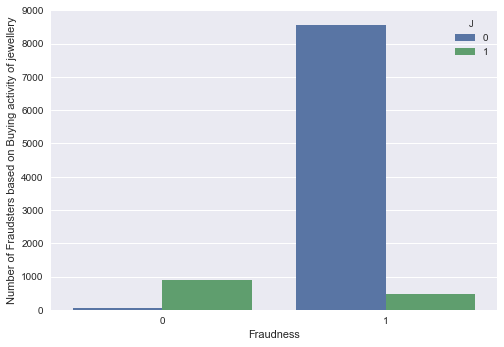

In [122]:
# Numpy is generally used for making fancier lists called arrays and series. 
import numpy as np 
# Pandas is super important, it's the foundation data analysis library we're using.
import pandas as pd 
# Matplotlib is the python plotting library and folks generally import it as "plt"
import matplotlib.pyplot as plt 
import matplotlib.image as img 

# Seaborn is a wrapper for Matplotlib and makes some things easier, generally imported as "sns"
import seaborn as sns
#importing data
df = pd.read_csv("./data/Fraud/fraud_data.csv")
df1 = pd.crosstab(index=df["F"], 
                  columns=df["S"],
                 margins =True)
df1.columns=["Female","Male","RowTotal"]
df1.index= ["Fraud","Not Fraud","ColTotal"]
print(df1)
print("\n")
df2 = pd.crosstab(index = df["F"],
                  columns=df["J"],
                  margins = True
                )
df2.columns=["Buying Jewellry","Not Buying Jewellry","RowTotal"]
df2.index= ["Fraud","Not Fraud","Coltotal"]
print(df2)
print("\n")
df3 = pd.crosstab(index = df["F"],
                  columns=df["G"],
                  margins=True
                 )
df3.columns=["Buying Gas","Not Buying Gas","RowTotal"]
df3.index= ["Fraud","Not Fraud","ColTotal"]
print(df3)
print("\n")
df4 = pd.crosstab(index = df["F"],
                  columns=df["A"],
                  margins =True
                 )
df4.columns=["Less than 30","Between 30 to 50","Above 50","RowTotal"]
df4.index= ["Fraud","Not Fraud","ColTotal"]
print(df4)
print("\n")
sns.countplot(x="F",hue="S", data=df).set(xlabel='Fraudness', ylabel='Number of Fraudsters by Gender')
sns.plt.show()
sns.countplot(x="F",hue="A", data=df).set(xlabel='Fraudness', ylabel='Number of Fraudsters by Age Group')
sns.plt.show()
sns.countplot(x="F",hue="G", data=df).set(xlabel='Fraudness', ylabel='Number of Fraudsters based on buying activity of Gas')
sns.plt.show()
sns.countplot(x="F",hue="J", data=df).set(xlabel='Fraudness',ylabel='Number of Fraudsters based on Buying activity of jewellery')
sns.plt.show()

## *From first contingency table we can see that probability of commiting fraud is almost equal irrespective of gender*

## *From second contingency table it can be inferred that people who buy jewellery are less likely to commit fraud*

## *From third contingency table we can observe that people who buy gas are more likely to commit fraud*

## *From fourth contingency table it can be seen that irrespective of age all people have almost same probability to commit fraud*

## *Models used for tackling this problem*
### Decsion tree:
<img src="./decisiontree.png" alt="Alt text that describes the graphic" title="Decision Tree" />
### We used *"entropy"* as cost function for deciding the split point, basically entropy is measure of impurity,A node with least impurity is considered as root and in a recursive fashion we decide the split points of the sub trees,Using this model we got accuracy of 94.88
### Support Vector Machine:
<img src="./svm.png" alt="Alt text that describes the graphic" title="I Support vector Machines" />
### We used *Radial Basis Function* as kernel to convert input space into linearly seperable space and we used C=1 and gamma= 0.5 as hyperparameters
### Artificial Neural Networks:
<img src="./ann.png" alt="Alt text that describes the graphic" title="Artificial Neural Network" />
### We used *hand coded* artificial neural net for this classification problem with two hidden layers and used **STOCHAISTIC GRADIENT DESCENDENT** along with **BACKPROPAGATION** ,  We used **SIGMOID ACTIVATION  FUNCTION** and **SQUARED ERROR** for training. The NN and achieved accuracy of 94.625 
### Random Forest(Ensemble):
<img src="./RF.png" alt="Alt text that describes the graphic" title="Artificial Neural Network" />
### Random Forest as name implies combines the power of base decision trees and takes plural voting for predicting class



# Why Decision Tree/Ensemble are giving better accuracy when compared to strong models like SVM and Artificial Neural Network?

## From the above contingency table we can see that all attribures are categorical, So it is hard to classify unless we use information mapping classifiers like decision trees and random forests(ensemble)


In [159]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop("F",axis=1)
Y = df["F"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
clf =  DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)

print("Accuracy of Decision Tree :",end="")
print(accuracy_score(Y_test, y_predict)*100)
print("\n")

from sklearn.ensemble import RandomForestClassifier
clfrf = RandomForestClassifier()
clfrf.fit(X_train,Y_train)
y_2 = clfrf.predict(X_test)
print("Accuracy of Random forest : ",end="")
print(accuracy_score(Y_test, y_2)*100)
print("\n")

from sklearn.svm import SVC
clfsvm = SVC(kernel='rbf', C=1, gamma=0.5,decision_function_shape='ovr')
clfsvm.fit(X_train,Y_train)
y_3 = clfsvm.predict(X_test)
print("Accuracy of Support vector Machine : ",end="")
print(accuracy_score(Y_test, y_3)*100)

Accuracy of Decision Tree :94.88


Accuracy of Random forest : 94.88


Accuracy of Support vector Machine : 94.88


In [169]:
import random

class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                correct = self.evaluate(test_data)
                print("Epoch {0}: {1} / {2} = {3}".format(
                    j, correct, n_test, (correct/n_test)*100))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))


def loaderWrapper():
    file = open("./data/Fraud/fraud_data.csv","r")
    data = []
    file.readline()
    for line in file:
        data.append(list(map(int, line.split(","))))
    x , y = [], []
    for i in range(len(data)):
        x.append((data[i][0], data[i][1], data[i][3], data[i][4]))
    for i in range(len(data)):
        y.append(data[i][2])
    trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.4, random_state = 42)
    file.close()
    return trainX, trainY, testX, testY

if __name__ == "__main__":
    trainX, trainY, testX, testY = loaderWrapper()
    trainingData = []
    for i in range(len(trainX)):
        arr = np.zeros((6,1))
        arr[0][0] = trainX[i][0]
        arr[trainX[i][1]+1][0] = 1
        arr[4][0] = trainX[i][2]
        arr[5][0] = trainX[i][3]
        result = np.zeros((2,1))
        result[trainY[i]] = 1
        trainingData.append((arr, result))
    testData =[]
    for i in range(len(testX)):
        arr = np.zeros((6,1))
        arr[0][0] = testX[i][0]
        arr[testX[i][1]+1][0] = 1
        arr[4][0] = testX[i][2]
        arr[5][0] = testX[i][3]
        testData.append((arr, testY[i]))
    net = Network([6, 64, 32, 2])
    net.SGD(trainingData, 30, 10, 1.5, test_data=testData)


Epoch 0: 3785 / 4000 = 94.625
Epoch 1: 3785 / 4000 = 94.625
Epoch 2: 3785 / 4000 = 94.625
Epoch 3: 3785 / 4000 = 94.625
Epoch 4: 3785 / 4000 = 94.625
Epoch 5: 3785 / 4000 = 94.625
Epoch 6: 3785 / 4000 = 94.625
Epoch 7: 3738 / 4000 = 93.45
Epoch 8: 3785 / 4000 = 94.625
Epoch 9: 3720 / 4000 = 93.0
Epoch 10: 3785 / 4000 = 94.625
Epoch 11: 3785 / 4000 = 94.625
Epoch 12: 3782 / 4000 = 94.55
Epoch 13: 3762 / 4000 = 94.05
Epoch 14: 3738 / 4000 = 93.45
Epoch 15: 3762 / 4000 = 94.05
Epoch 16: 3785 / 4000 = 94.625
Epoch 17: 3785 / 4000 = 94.625
Epoch 18: 3678 / 4000 = 91.95
Epoch 19: 3785 / 4000 = 94.625
Epoch 20: 3785 / 4000 = 94.625
Epoch 21: 3785 / 4000 = 94.625
Epoch 22: 3738 / 4000 = 93.45
Epoch 23: 3785 / 4000 = 94.625
Epoch 24: 3672 / 4000 = 91.8
Epoch 25: 3720 / 4000 = 93.0
Epoch 26: 3678 / 4000 = 91.95
Epoch 27: 3785 / 4000 = 94.625
Epoch 28: 3785 / 4000 = 94.625
Epoch 29: 3785 / 4000 = 94.625
